# Breast Cancer Classifier Comparison

By Iván del Horno Sotillo

This notebook is part of a Bachelor Thesis project. The main goal of this project is to compare different machine learning algorithms in order to find the best one for the classification of breast cancer. The dataset used is the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) from the UCI Machine Learning Repository.

The dataset contains 569 samples of benign and malignant tumor cells with features computed from an image obtained from a FNAB (Fine Needle Aspirate Biopsy).

More information will be available in the Thesis document.

## 1. Preparation

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

In [2]:
# Load the data
data = load_breast_cancer()

# Create a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Swap the 0s and 1s in the target column so that 0 is benign and 1 is malignant
# It is just personal preference, I think it is easier to read this way
df['target'] = df['target'].apply(lambda x: 0 if x == 1 else 1)

### Basic information about the dataset

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Thanks to importing the dataset directly from Scikit-Learn, we can get some basic information about it.
We can see that we have 569 samples, out of which 212 are malignant and 357 are benign. The dataset has 30 features which are all numeric values. We can also see that there are no missing values.

The 30 features are based on 10 attributes (listed in the description above), and from each attribute we obtain the mean, the standard error and the worst (mean of the three largest values).

Then we have two classes, either malignant or benign tumor.

## 2. Exploratory Data Analysis

Now that we have loaded the dataset, and saw the basics of it, we can start a more in-depth exploration of the data.

This step is really important since it will help us understand the data that we are using, the relationships between the different features, which features are more important, etc. With this information we will be able to make more educated decisions when preprocessing the data and optimizing the classifiers.

To carry out this analysis we will do the following:
1. **Descriptive Statistics:** We will have a look at numerical description of the data by means of the measurements: mean, standard deviation, minimum, maximum, etc.
2. **Data Visualization:** We will plot the data in order to see the relationships between the different features and the classes.

### 2.1 Descriptive Statistics

#### Basic statistics

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


From this quick statistical description we can see some interesting things:
- The median (50%) is usually a bit smaller than the mean, which would mean that the data is lightly skewed, we will see this in the next section.
- The difference between the 75% and the max is quite big in some cases (worst area 75% = 1084 and worst area max = 4254), which would mean that there are some outliers in the data, this will also be seen later.
- The range in some values is pretty large, for example in mean area we go from a min of 143.5 to a max of 2501.0, this means that we will have to scale the data in order to be able to use it in some classifiers.
- The standard deviation is also quite large in some cases, for example in worst area we have a standard deviation of 569.4, this points out that the data is really spread out emphasizing the need to scale the data.
- Lastly, some features have values that go from 0.05 to 0.16 and other from 185 to 4254, this further emphasizes the need to scale the data.

#### Skewness

In [5]:
print(df.skew())

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

The skewness measures the assymetry of the probability distribution.
- If skewness < -1 or skewness > 1, the distribution is highly skewed.
- If skewness is close to 0, the distribution is approximately symmetric.
- If the skewness is positive, we say it is right skewed, if it is negative, it is left skewed.

We will omit the target since it is not a feautre but a class.

From the values that we have obtained we can see that all of them are positive, which means that all the features are right skewed. Some of them are highly skewed with values of up to 5.45 in the case of area error. This unevenness in the distribution is not only product of the nature of the data, but also because of outliers which we will see in the data visualization section.

### 2.2 Data Visualization

In the previous section we saw an overview of the numerical description of the data, now we will plot the data to better undesrtand what we saw and to see the relationships between the different features.

#### Data Distribution

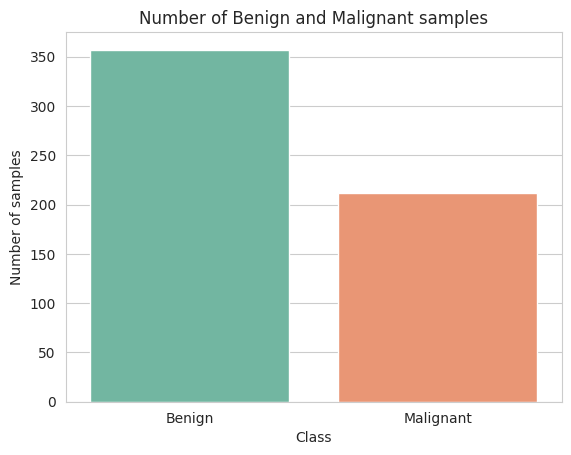

Total number of samples: 569
Percentage of Benign samples: 62.74 %
Percentage of Malignant samples: 37.26 %


In [6]:
# Copy of the dataframe but replacing the class numbers with the class names
labeled_df = df.copy()
labeled_df['target'] = labeled_df['target'].replace({0: 'Benign', 1: 'Malignant'})

sns.set_style("whitegrid")

# Custom color palette so that malignant are red
set2_palette = sns.color_palette('Set2')
set2_palette[0], set2_palette[1] = set2_palette[1], set2_palette[0]

# Set the modified 'Set2' palette as the default palette
sns.set_palette(set2_palette)

sns.countplot(x='target', hue='target', data=labeled_df, legend=False, order=['Benign', 'Malignant'])

plt.title('Number of Benign and Malignant samples')
plt.xlabel("Class")
plt.ylabel("Number of samples")

plt.show()

print('Total number of samples:', len(df))
print('Percentage of Benign samples:', round(df['target'].value_counts()[0] / len(df) * 100, 2), '%')
print('Percentage of Malignant samples:', round(df['target'].value_counts()[1] / len(df) * 100, 2), '%')

From this information we can see that the class distribution is imbalanced, with a 62% of the samples being benign and a 37% being malignant. Although it is not a really big difference, it is something that we will have to remember and pay attention since it could mean that the classifiers will be biased towards the benign class (majority class).

#### Correlation Matrix

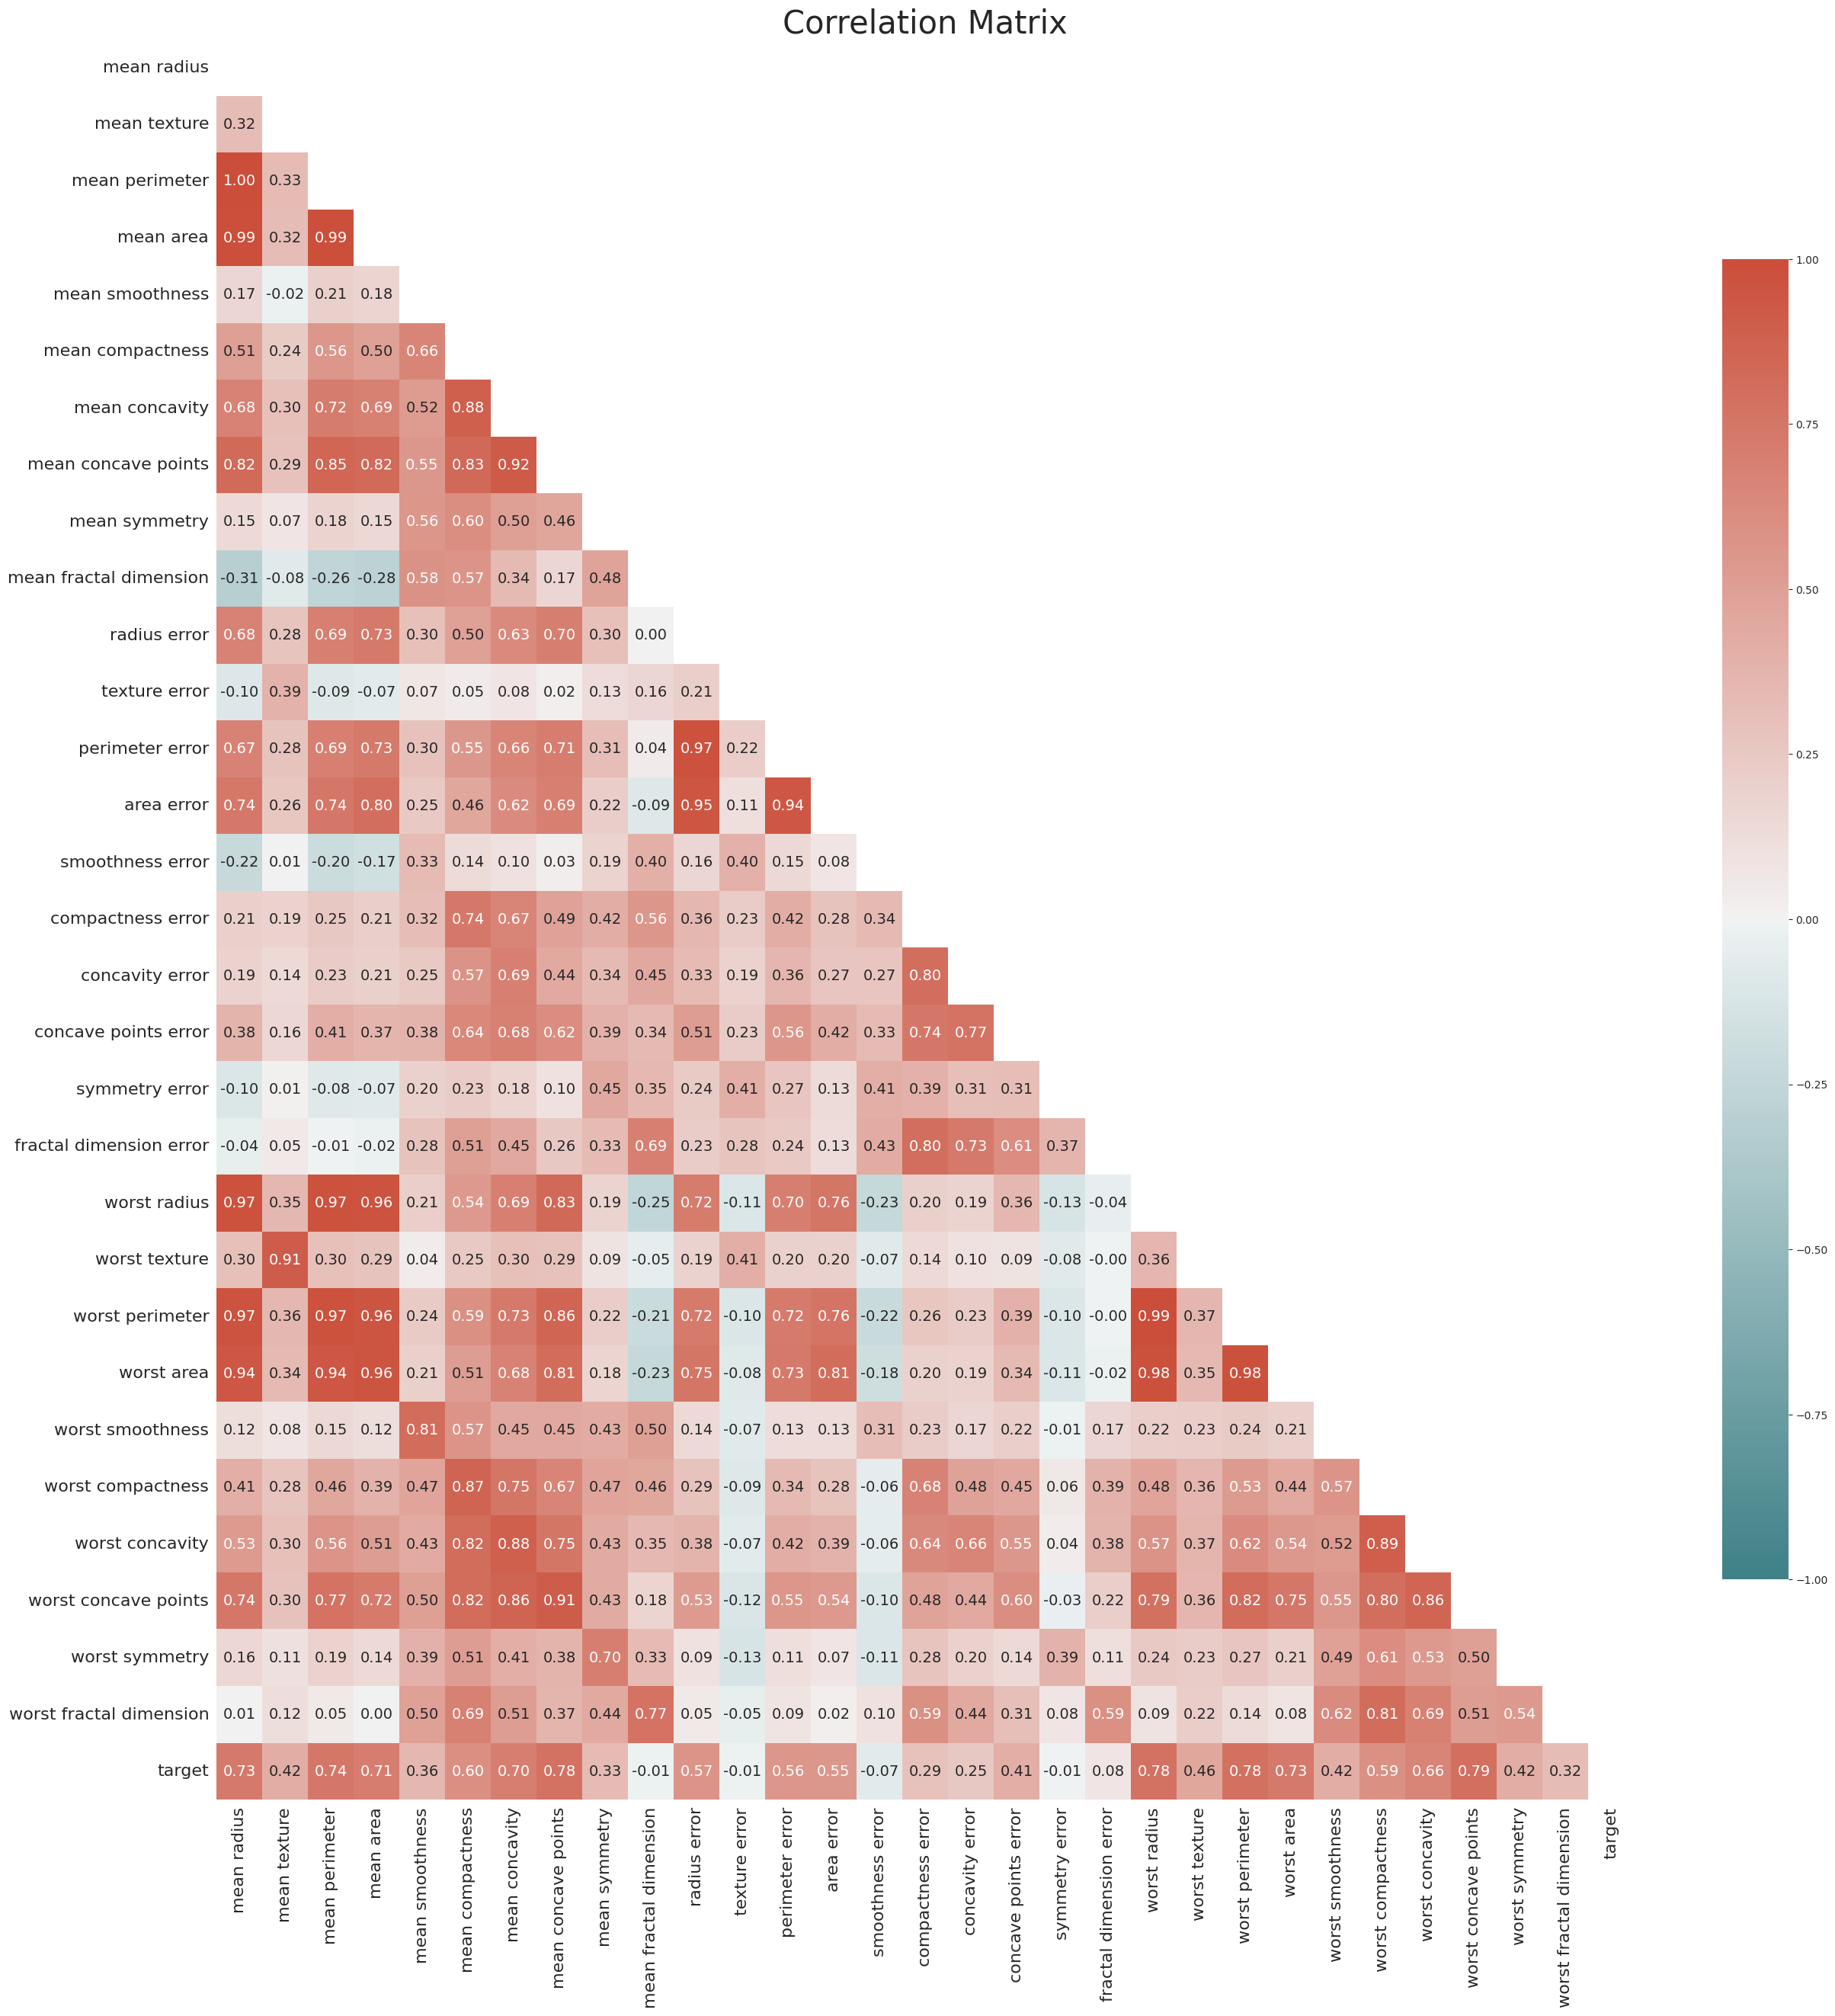

In [7]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30, 30))

# Custom diverging colormap so it matches with the previous graph
set2_diverging_palette = sns.diverging_palette(202, 17, as_cmap=True)

sns.set_style("white")
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=set2_diverging_palette,
            vmin=-1, vmax=1, cbar_kws={"shrink": 0.75}, annot_kws={"fontsize": 14})

plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Correlation Matrix", fontsize=30)
plt.show()


The matrix above is called the correlation matrix, it shows the correlation between two different features. The values range from -1 to 1, where the extremes mean that the features are highly correlated while the values close to 0 mean that the features are not correlated at all.

From this matrix we can see that there are some features that are highly correlated, to make sure that we don't skip any of them while looking at the heatmap (since there are a lot of features), we will now print the features that are highly correlated.

First we will look at the features that have an absolute value of correlation higher than 0.9 but not 1.0 since that would mean that they are correlated with themselves.

In [8]:
high_corr = corr[(corr > 0.9) & (corr != 1.0)].stack().reset_index()

high_corr = high_corr.rename(
    columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})

high_corr[['Feature 1', 'Feature 2']] = np.sort(
    high_corr[['Feature 1', 'Feature 2']].values, axis=1)
high_corr['Correlation'] = high_corr['Correlation'].apply(
    lambda x: round(x, 2))

high_corr = high_corr.drop_duplicates().sort_values(
    by='Correlation', ascending=False)

high_corr

,Feature 1,Feature 2,Correlation
0,mean perimeter,mean radius,1.00
1,mean area,mean radius,0.99
7,mean area,mean perimeter,0.99
28,worst perimeter,worst radius,0.99
29,worst area,worst radius,0.98
35,worst area,worst perimeter,0.98
19,perimeter error,radius error,0.97
2,mean radius,worst radius,0.97
3,mean radius,worst perimeter,0.97
9,mean perimeter,worst perimeter,0.97


From this we can see that there are multiple features that are highly correlated, this is because some of them are mathematically correlated already, such as the mean radius and mean perimeter. We can also note that if a feature is correlated with another, it is usually also correlated with the other instances of that feature, for example, mean area and mean perimeter are correlated, and worst area and worst perimeter are also correlated, also for the error instances. There are also high correlations between the mean and the worst values of some features. Lastly, the concavity and concave points are also highly correlated, what indicates that when the number of concave points increases, the severity of these ones also increases.

To better see the correlation between each feauture we will now do pairplots.

#### Pairplots

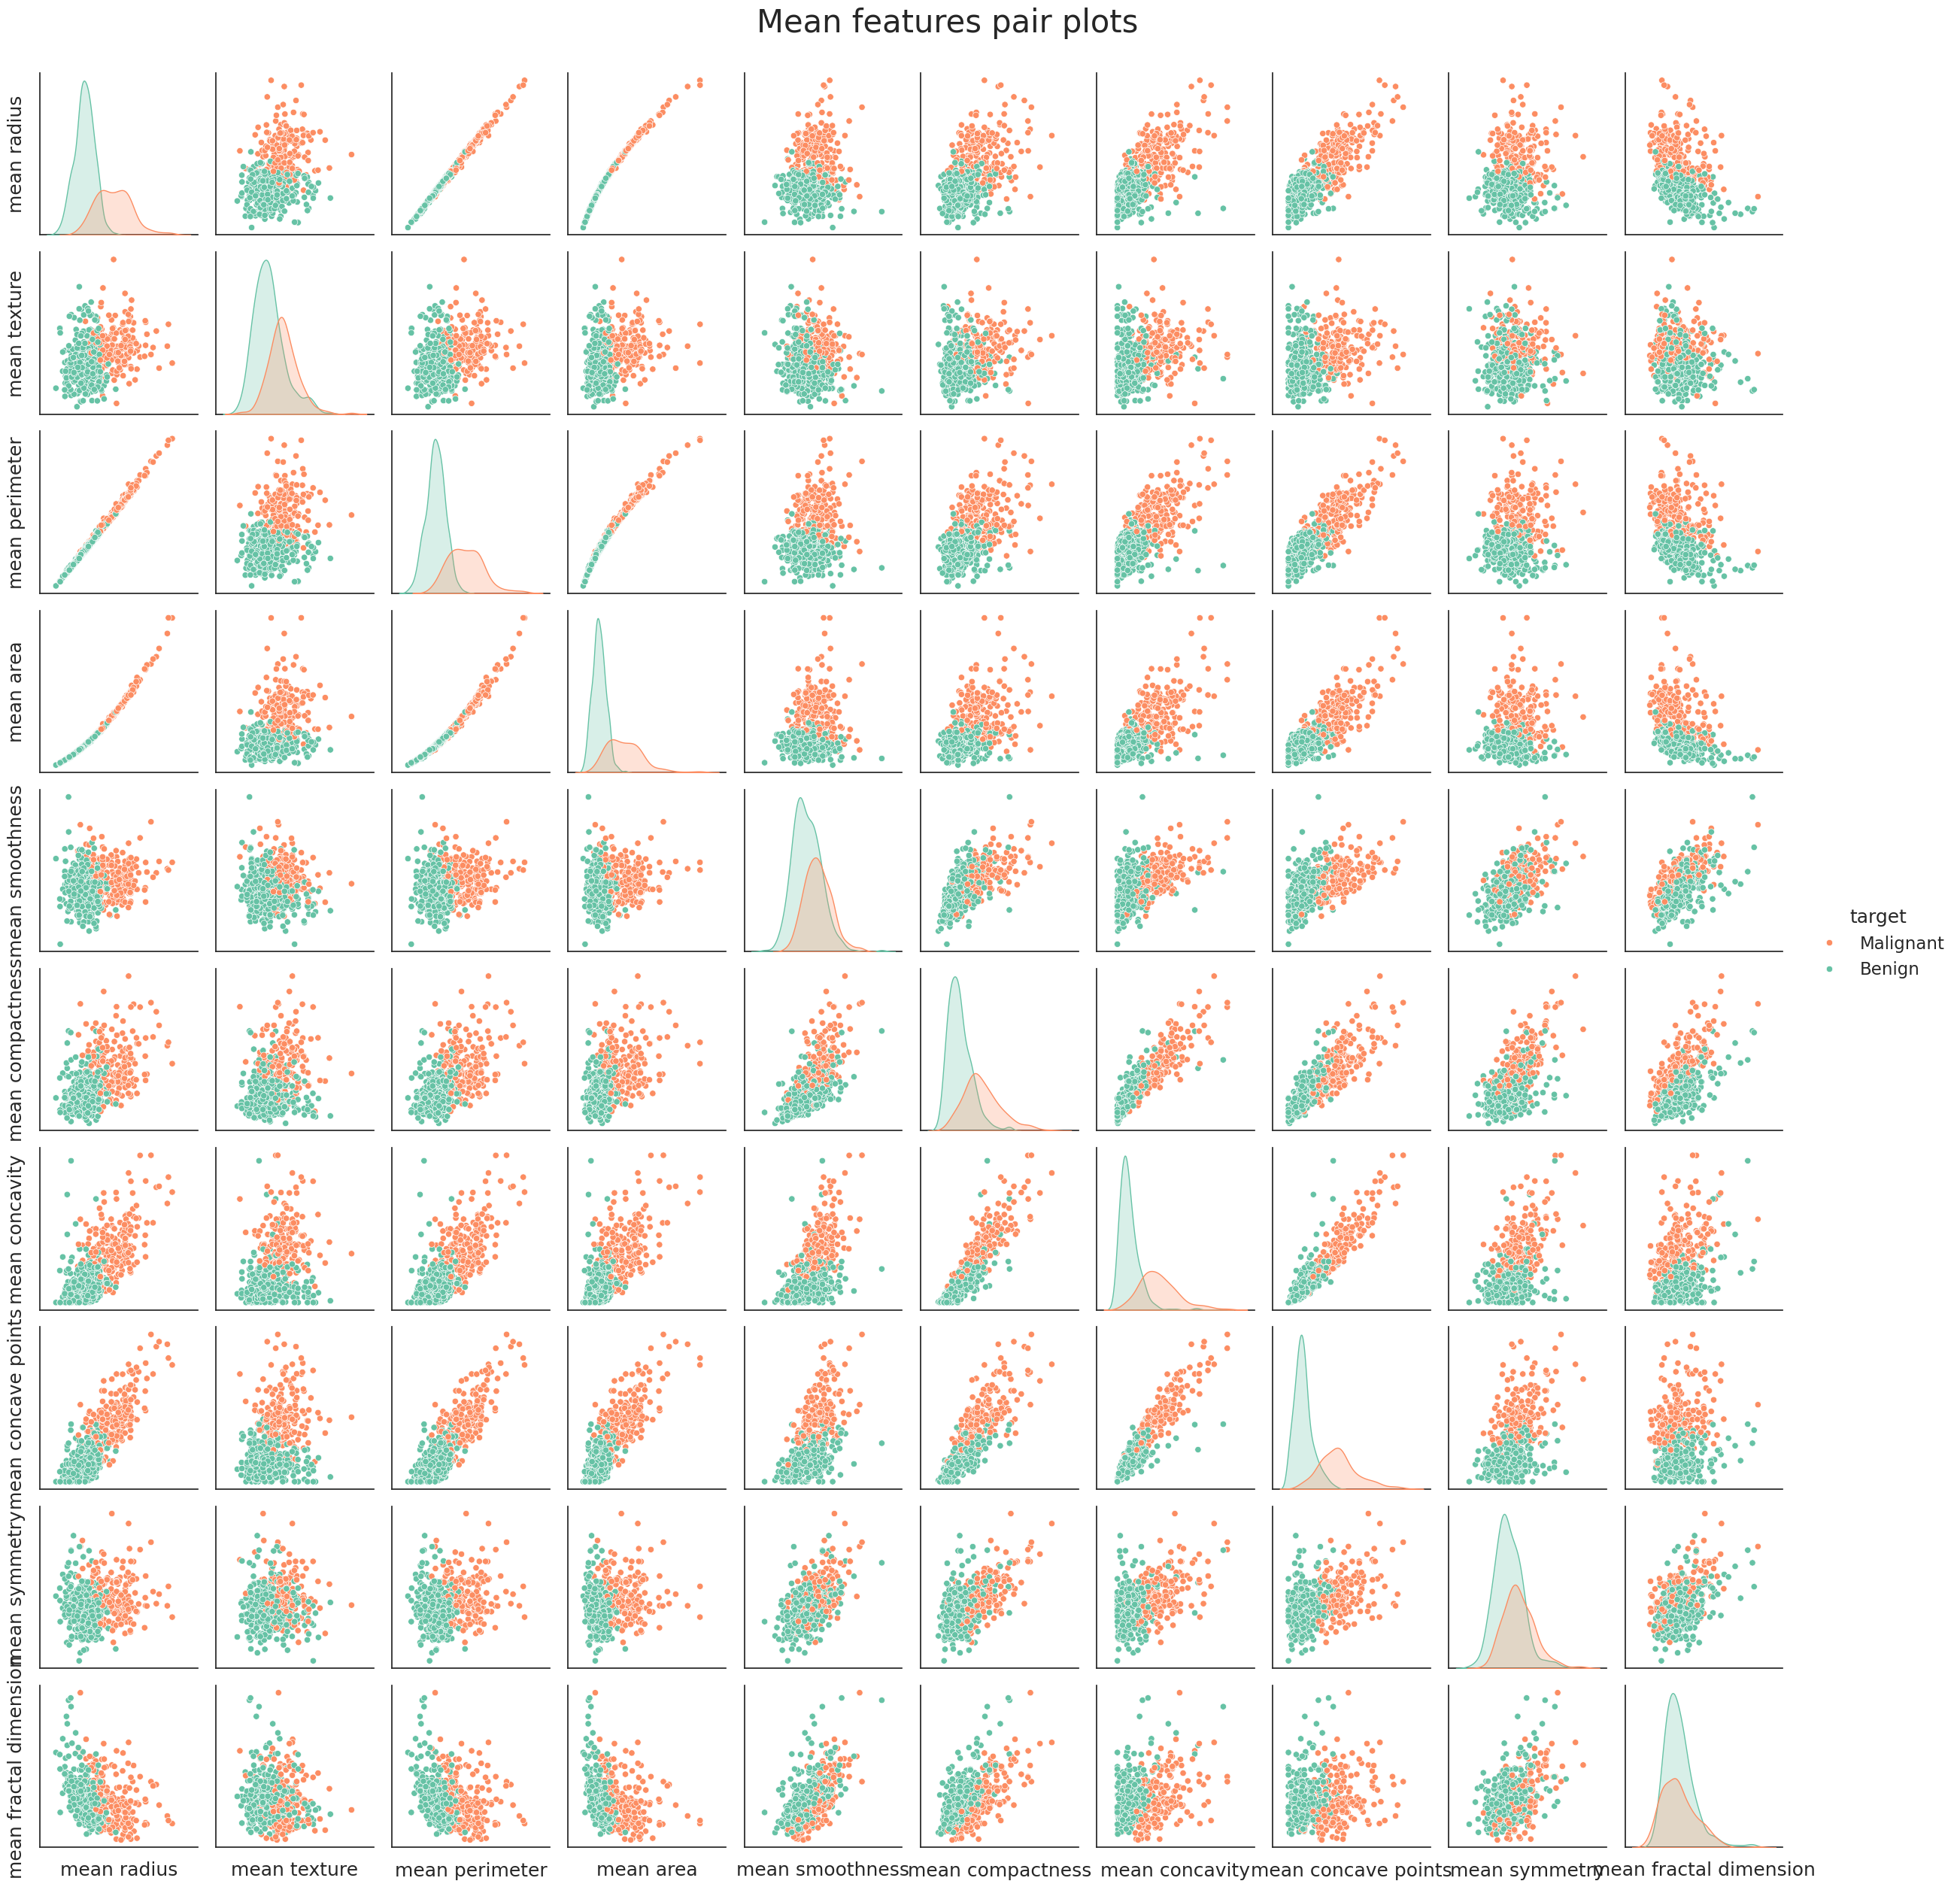

In [23]:
# only the mean features bc if not it is illegible
mean_columns = [col for col in df.columns if 'mean' in col]
df_mean = labeled_df[mean_columns].copy()

df_mean.loc[:, 'target'] = labeled_df['target']

sns.set(font_scale=1.5, style="white", color_codes=True)
# take the first two colros to avoid warning!
g = sns.pairplot(df_mean, hue='target', palette=set2_palette[:2])
g.fig.suptitle("Mean features pair plots", y=1.02, fontsize=30)

# we dont need the numbers on the axis now, we just care about the plot
for ax in g.axes.flatten():
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()


We just plotted the correlation between the mean features since the worst and error had similar values in the correlation matrix and having a pair plot of 30 by 30 is not really useful.

The key observation in these plots is that they are somewhat separable, which means that we will be able to design a classifier that is able to distinguish between benign and malignant samples.